In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [94]:
from tensorflow.keras.layers import Dense,Input,Layer
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
from tensorflow.keras import models, layers, regularizers
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [95]:
dataset = pd.read_csv("/gdrive/My Drive/drug200.csv")

df_encoded = pd.get_dummies(dataset, columns=['Sex', 'BP', 'Cholesterol', 'Drug'])

# Check the column names in the DataFrame after one-hot encoding
print(df_encoded.columns)

Index(['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
       'Cholesterol_HIGH', 'Cholesterol_NORMAL', 'Drug_drugA', 'Drug_drugB',
       'Drug_drugC', 'Drug_drugX', 'Drug_drugY'],
      dtype='object')


In [96]:
X = df_encoded[['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]
Y = df_encoded[['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY']]

# Display the first few rows of the dataset
print(df_encoded.head())

x1 = X.to_numpy()
y1 = Y.to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20)

   Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0   23   25.355      1      0        1       0          0                 1   
1   47   13.093      0      1        0       1          0                 1   
2   47   10.114      0      1        0       1          0                 1   
3   28    7.798      1      0        0       0          1                 1   
4   61   18.043      1      0        0       1          0                 1   

   Cholesterol_NORMAL  Drug_drugA  Drug_drugB  Drug_drugC  Drug_drugX  \
0                   0           0           0           0           0   
1                   0           0           0           1           0   
2                   0           0           0           1           0   
3                   0           0           0           0           1   
4                   0           0           0           0           0   

   Drug_drugY  
0           1  
1           0  
2           0  
3           0  
4     

In [92]:
df_encoded.tail()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
195,56,11.567,1,0,0,1,0,1,0,0,0,1,0,0
196,16,12.006,0,1,0,1,0,1,0,0,0,1,0,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,1,0
198,23,14.020,0,1,0,0,1,0,1,0,0,0,1,0
199,40,11.349,1,0,0,1,0,0,1,0,0,0,1,0


In [98]:
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])


In [100]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))




Epoch 1/10
5/5 [==============================] - 1s 82ms/step - loss: 16.8105 - accuracy: 0.1688 - val_loss: 13.9469 - val_accuracy: 0.1250
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 14.0261 - accuracy: 0.2062 - val_loss: 13.4766 - val_accuracy: 0.2500
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 13.2526 - accuracy: 0.2937 - val_loss: 12.8840 - val_accuracy: 0.1750
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 12.5738 - accuracy: 0.3125 - val_loss: 12.2250 - val_accuracy: 0.3500
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 11.8960 - accuracy: 0.2937 - val_loss: 11.5347 - val_accuracy: 0.4500
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 11.1957 - accuracy: 0.3375 - val_loss: 10.8373 - val_accuracy: 0.4500
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 10.4971 - accuracy: 0.3187 - val_loss: 10.1354 - val_accuracy: 0.4500
Epoch 8/10
5/

In [104]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 8.0651 - accuracy: 0.4500


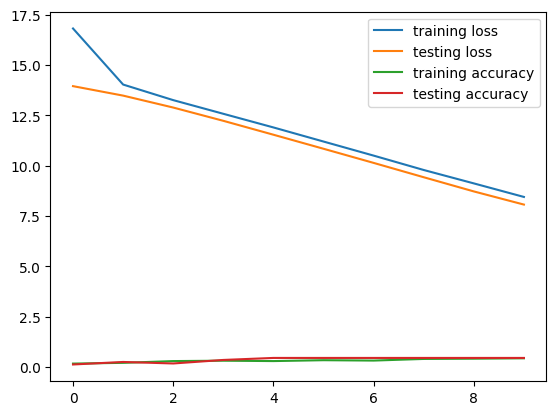

In [105]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='testing accuracy')
plt.legend()
plt.show()

In [106]:
print(f"Accuracy of the classification on the testing data: {test_accuracy}")

Accuracy of the classification on the testing data: 0.44999998807907104
